# Creating a Random Forest Classifier to Predict Grant Value 

Below is the code, written in R, to train and test a Random Forest classifier to predict the column 'grant bins'. It uses 8 featuers from the dataset which contain informatve information and not too many variable levels. The predictors are sector, innovate UK product type, is the participant the lead of the project, the project's duration in years, the total cost of the project, the enterprise size, the address region and if the project is apart of the industrial strategy challenge fund.

In [7]:
#import the libraries needed
library(caret)
library(randomForest)
library(mlbench)

#import the cleaned dataset created in Lara_Chammas_PDS jupyter notebook
data <- read.csv('Data_clean.csv')

In [8]:
#Print information about the dataset 
#The column names, the datatypes, how many levels are in each column 
#and how many observations and variables there are

str(data)

'data.frame':	29300 obs. of  20 variables:
 $ ProjectNumber       : int  101391 100005 100265 100867 130034 101252 130021 100439 131527 131384 ...
 $ ProjectTitle        : Factor w/ 16471 levels ".BioPU",".STLX – A secure system to transmit confidential Additive Manufacturing design and production data in an encryp"| __truncated__,..: 8985 9825 1041 9521 2616 14642 13636 8980 15886 2462 ...
 $ ProgrammeTitle      : Factor w/ 1133 levels "'Satellite' Food CR&D",..: 461 1132 965 789 199 1084 199 702 1015 901 ...
 $ CompetitionYear     : Factor w/ 16 levels "2003/04","2004/05",..: 10 4 2 8 7 10 7 5 11 11 ...
 $ Sector              : Factor w/ 6 levels "Development",..: 3 5 2 3 4 2 4 5 5 5 ...
 $ PublicDescription   : Factor w/ 13947 levels "- BACKGROUND: Peptides are a versatile class of biomolecule that can be deployed as critical components in adva"| __truncated__,..: 10089 2943 1726 2478 1726 5010 1726 1726 10140 10453 ...
 $ InnovateUKType      : Factor w/ 23 levels "BIS-Funded Progra

In [9]:
######## Classification Model: Predicting Grant Bins ######
set.seed(7) #set seed for reproducibility 

#partition the data based on grant bin class into a training set (75% of the data) and a testing set (25% of the data) 
inTrainingSet_Class <- createDataPartition(data$GrantBins, p = 0.75, list = FALSE) 

#create the training dataset
TrainClass <- data[inTrainingSet_Class,]
#create the testing dataset
TestClass <- data[-inTrainingSet_Class,]


#create a fit control parameter which specifies using repeated cross-validation with 10 folds and 3 repeats 
#running different values for the parameter mtry or number of variables randomly sampled as candidates at each split
#also have the model save the predictions and class probabilities
#print the interation number and parameter value it is on/testing
#and have the model use down sampling to improve class balance 
fitControlClass <- trainControl(method = "repeatedcv", number = 10, repeats = 3, verboseIter = TRUE, classProbs = TRUE, 
                                savePredictions=TRUE, sampling = "down")




In [10]:
#generate a trained random forest model using the specified tuning parameters above to predict grant bins using the 
#relevant features and maximiming on the metric accuracy 
set.seed(7)
RandomForestClass <- train(GrantBins ~ Sector + InnovateUKType + IsLeadParticipant + ProjectDurationYears + 
                        TotalCost + EnterpriseSize + AddressRegion +ISCF, data = TrainClass, 
                method = "rf", 
                trControl = fitControlClass, 
                metric = 'Accuracy') 

+ Fold01.Rep1: mtry= 2 
- Fold01.Rep1: mtry= 2 
+ Fold01.Rep1: mtry=32 
- Fold01.Rep1: mtry=32 
+ Fold01.Rep1: mtry=62 
- Fold01.Rep1: mtry=62 
+ Fold02.Rep1: mtry= 2 
- Fold02.Rep1: mtry= 2 
+ Fold02.Rep1: mtry=32 
- Fold02.Rep1: mtry=32 
+ Fold02.Rep1: mtry=62 
- Fold02.Rep1: mtry=62 
+ Fold03.Rep1: mtry= 2 
- Fold03.Rep1: mtry= 2 
+ Fold03.Rep1: mtry=32 
- Fold03.Rep1: mtry=32 
+ Fold03.Rep1: mtry=62 
- Fold03.Rep1: mtry=62 
+ Fold04.Rep1: mtry= 2 
- Fold04.Rep1: mtry= 2 
+ Fold04.Rep1: mtry=32 
- Fold04.Rep1: mtry=32 
+ Fold04.Rep1: mtry=62 
- Fold04.Rep1: mtry=62 
+ Fold05.Rep1: mtry= 2 
- Fold05.Rep1: mtry= 2 
+ Fold05.Rep1: mtry=32 
- Fold05.Rep1: mtry=32 
+ Fold05.Rep1: mtry=62 
- Fold05.Rep1: mtry=62 
+ Fold06.Rep1: mtry= 2 
- Fold06.Rep1: mtry= 2 
+ Fold06.Rep1: mtry=32 
- Fold06.Rep1: mtry=32 
+ Fold06.Rep1: mtry=62 
- Fold06.Rep1: mtry=62 
+ Fold07.Rep1: mtry= 2 
- Fold07.Rep1: mtry= 2 
+ Fold07.Rep1: mtry=32 
- Fold07.Rep1: mtry=32 
+ Fold07.Rep1: mtry=62 
- Fold07.Rep1: m

In [11]:
#print the model output 
print(RandomForestClass) 

#see highest accuracy predicted is 67% with mtry = 32

Random Forest 

21984 samples
    8 predictor
   23 classes: 'Value_1_5000', 'Value_105000_115000', 'Value_115000_125000', 'Value_125000_135000', 'Value_135000_145000', 'Value_145000_155000', 'Value_15000_25000', 'Value_155000_165000', 'Value_165000_175000', 'Value_175000_185000', 'Value_185000_200000', 'Value_200000_300000', 'Value_25000_35000', 'Value_300000_400000', 'Value_35000_45000', 'Value_400000_plus', 'Value_45000_55000', 'Value_5000_15000', 'Value_55000_65000', 'Value_65000_75000', 'Value_75000_85000', 'Value_85000_95000', 'Value_95000_105000' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 19782, 19790, 19787, 19788, 19786, 19784, ... 
Addtional sampling using down-sampling

Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.2999630  0.2468072
  32    0.6732784  0.6526283
  62    0.6551726  0.6335352

Accuracy was used to select the optimal model using the largest value.
The final value u

In [12]:
#Print the variables of importance for the model and their scaled (to 100) level of importance
#which is based on the class-specific mean decrease in accuracy for each class

varImps <- varImp(RandomForestClass)
print(varImps)

rf variable importance

  only 20 most important variables shown (out of 62)

                                  Overall
TotalCost                         100.000
ProjectDurationYears               11.171
EnterpriseSizeSmall                 5.646
EnterpriseSizeMicro                 5.578
EnterpriseSizeLarge                 5.097
IsLeadParticipantYes                5.008
EnterpriseSizeMedium                4.328
AddressRegionSouth East             4.057
SectorEmerging & Enabling           3.626
AddressRegionLondon                 3.548
SectorManufacturing & Materials     3.532
SectorInfrastructure Systems        3.064
AddressRegionEast of England        3.053
SectorHealth & Life Science         2.743
InnovateUKTypeCollaborative R&D     2.569
InnovateUKTypeInnovation Vouchers   2.564
AddressRegionWest Midlands          2.554
AddressRegionSouth West             2.508
InnovateUKTypeFeasibility Studies   2.488
AddressRegionNorth West             2.468


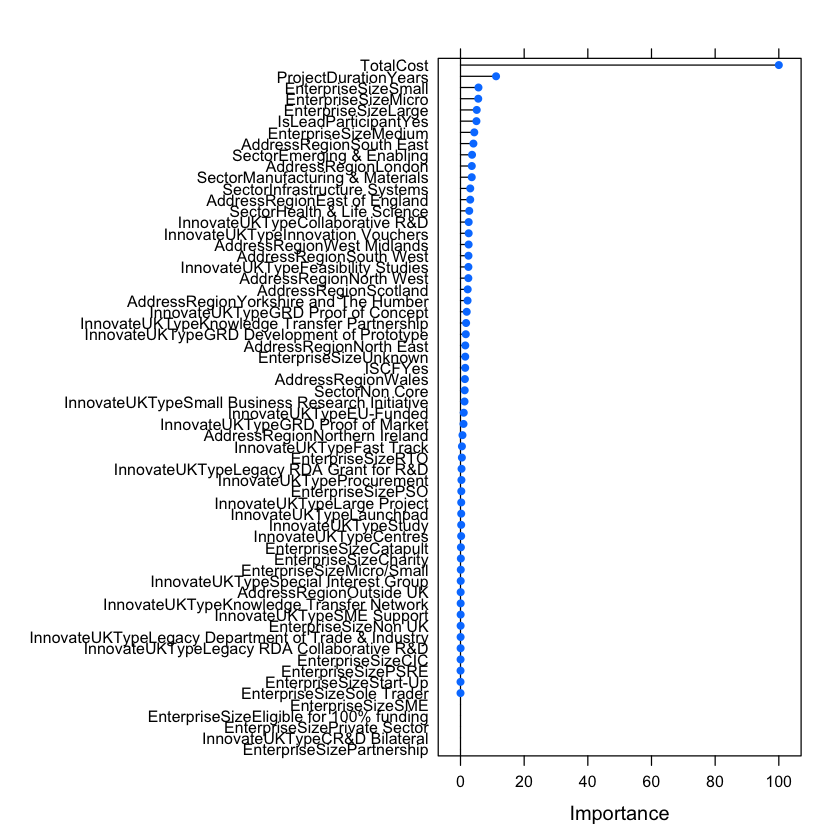

In [13]:
#print a plot of the variables of importance 
plot(varImps)


In [14]:
## Training Results
##Test the model's prediction accuracy on the training dataset by generating a confusion matrix
RandomForestTrain <- predict(RandomForestClass, newdata = TrainClass)
confusionMatrix(RandomForestTrain, TrainClass$GrantBins) 

#overall accuracy = 77.23%

Confusion Matrix and Statistics

                     Reference
Prediction            Value_1_5000 Value_105000_115000 Value_115000_125000
  Value_1_5000                2690                   0                   0
  Value_105000_115000            0                 426                  10
  Value_115000_125000            1                  12                 407
  Value_125000_135000            0                  26                  19
  Value_135000_145000            0                   3                   9
  Value_145000_155000            0                  10                   8
  Value_15000_25000              9                   0                   0
  Value_155000_165000            2                  11                  10
  Value_165000_175000            1                   2                  12
  Value_175000_185000            2                   4                   6
  Value_185000_200000            0                   1                   4
  Value_200000_300000            1  

In [15]:
##Testing Results  

#Test the model's prediction accuracy on an unseen data-set by running the model over the unseen "TestClass" dataset
#also by using a confusion matrix
RandomForestTest <- predict(RandomForestClass, newdata = TestClass)
confusionMatrix(RandomForestTest, TestClass$GrantBins)

#Accuracy decreases to 66.85%


Confusion Matrix and Statistics

                     Reference
Prediction            Value_1_5000 Value_105000_115000 Value_115000_125000
  Value_1_5000                 884                   0                   0
  Value_105000_115000            0                 110                   7
  Value_115000_125000            0                   9                 105
  Value_125000_135000            0                  18                   3
  Value_135000_145000            0                   9                   3
  Value_145000_155000            0                   8                   4
  Value_15000_25000              5                   0                   0
  Value_155000_165000            0                   5                   8
  Value_165000_175000            1                   5                   8
  Value_175000_185000            0                   2                   5
  Value_185000_200000            0                   1                   4
  Value_200000_300000            0  

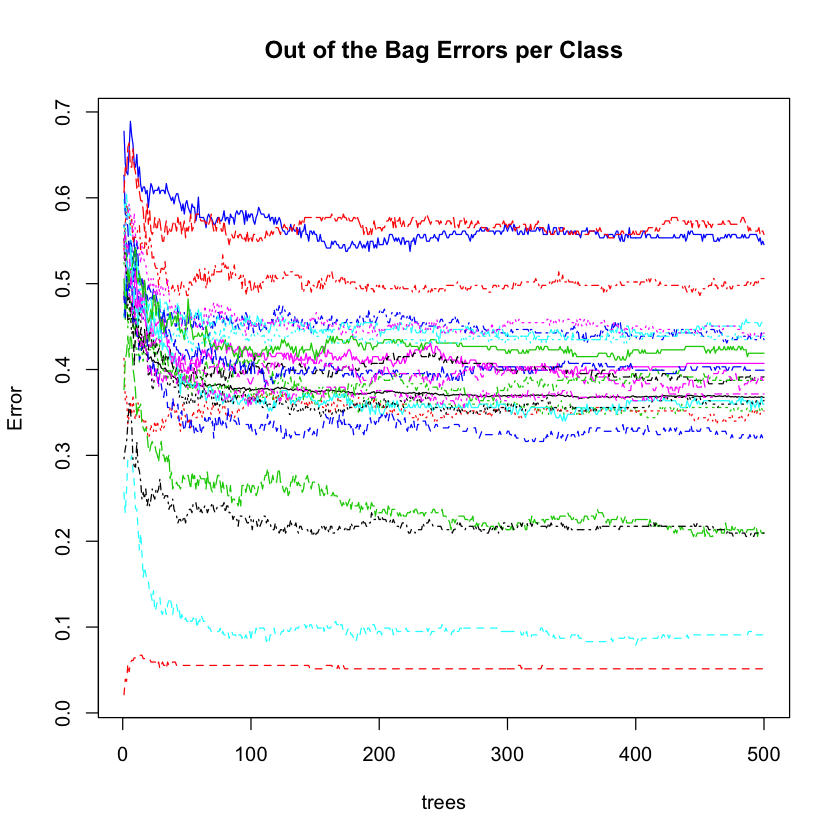

In [21]:
#plot a graph of the out-of-the-bag (oob) errors for each class over different numbers of trees in the forest
#the black line is the overall oob-error for all the classes 
#the rest of the colors represent the errors for each class
plot(RandomForestClass$finalModel, main = 'Out of the Bag Errors per Class')

In [ ]:
#Note, ROC curves could not be calulated as this was not a binary classification model
#but instead a multi (23) classification predictive model 